<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Evaluation/Flowers_Evaluation/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown "https://drive.google.com/u/0/uc?export=download&confirm=Eptv&id=0B_voCy5O5sXMTFByemhpZllYREU" 
!tar -xf /content/drive/MyDrive/flowers

Downloading...
From: https://drive.google.com/u/0/uc?export=download&confirm=Eptv&id=0B_voCy5O5sXMTFByemhpZllYREU
To: /content/PlantVillage.tar.gz
830MB [00:05, 150MB/s]
tar: /content/drive/MyDrive/flowers: Cannot read: Is a directory
tar: At beginning of tape, quitting now
tar: Error is not recoverable: exiting now


In [ ]:
validation_path_file = '/content/drive/MyDrive/Results/flowersDataSet/validation.csv'
validation_df = pd.read_csv(validation_path_file)


In [ ]:
image_size = (224,224)
batch_size = 128
data_set_path = '/content/drive/MyDrive/flowers'
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= data_set_path,
                  target_size=image_size,
                  batch_size=batch_size,
                  shuffle=False
                  ) 

Found 1296 validated image filenames belonging to 5 classes.


In [ ]:
model_path = '/content/drive/MyDrive/Results/flowersDataSet/DenseNet121Arch/DenseNet121Arch.h5'
model = load_model(model_path)

In [ ]:
def train_result(history_path):
  train_result_df = pd.read_csv(history_path,index_col=0)
  return train_result_df

In [ ]:
def plot_train_history(train_result_df):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  train_result_df.plot(ax=axes[0],y=['accuracy','val_accuracy'])
  train_result_df.plot(ax=axes[1],y=['loss','val_loss'])

In [ ]:
def crops_evaluate_mdoel(model,validation_generator):
  classes_names =list(validation_generator.class_indices.keys())
  validation_generator.reset()

  start_time = time.time()
  results = model.predict(validation_generator)
  nb_example = np.array(results).shape[1]
  prediction_duration = (time.time() - start_time)/nb_example

  results = np.array(results)
  predicted_labels_idx = np.argmax(results,axis=1)
  predicted_labels_names = np.array([classes_names[label] for label in predicted_labels_idx])

  real_labels_idx = validation_generator.labels
  real_labels_names = np.array([classes_names[label] for label in real_labels_idx])

  report = classification_report(real_labels_names,predicted_labels_names,labels=classes_names,digits=3,output_dict=True)
  
  result_labels = {}
  for label in classes_names:
    crop_result = report[label]
    result_labels[label]=crop_result

  results_df = pd.DataFrame.from_dict(result_labels,orient='index') 
  
  return results_df

In [ ]:
def global_evaluate_mdoel(model,validation_generator):

  classes_names =list(validation_generator.class_indices.keys())
  validation_generator.reset()

  start_time = time.time()
  results = model.predict(validation_generator)
  nb_example = np.array(results).shape[1]
  prediction_duration = (time.time() - start_time)/nb_example

  results = np.array(results)
  predicted_labels_idx = np.argmax(results,axis=1)
  predicted_labels_names = np.array([classes_names[label] for label in predicted_labels_idx])

  real_labels_idx = validation_generator.labels
  real_labels_names = np.array([classes_names[label] for label in real_labels_idx])

  report = classification_report(real_labels_names,predicted_labels_names,labels=classes_names,digits=3,output_dict=True)
  model_result = {'prediction_duration':prediction_duration,'Accuracy':report['accuracy'],'Precision':report['macro avg']['precision'],'Recall':report['macro avg']['recall'],'F1-score':report['macro avg']['f1-score']}
  
  return model_result

INFO: Srart test of : MobileNetArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   1.334888  0.484608  0.839251      0.682099
1   0.748457  0.787157  0.445738      0.844136
2   0.468730  0.858987  0.359216      0.868827
3   0.354982  0.894075  0.325869      0.881944
4   0.286540  0.909964  0.295748      0.896605
5   0.214440  0.932804  0.281548      0.898148
6   0.172647  0.949023  0.268197      0.901235
7   0.138955  0.955975  0.262064      0.904321
8   0.113790  0.966898  0.259791      0.904321
9   0.094704  0.974181  0.262541      0.906636
10  0.071340  0.985104  0.262274      0.905093
11  0.064864  0.980470  0.261851      0.911265
12  0.061230  0.984111  0.267559      0.905864
13  0.039357  0.994373  0.269047      0.908179
14  0.037197  0.993049  0.270513      0.905864
  -----> training plots
  -----> print results per crop
           precision    recall  f1-score  support
daisy       0.926230  0.926230  0.926230      244
dandelion   0.928349  0.934169

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  -----> print results per crop
           precision    recall  f1-score  support
daisy       0.300000  0.012295  0.023622      244
dandelion   0.244168  0.984326  0.391277      319
rose        0.000000  0.000000  0.000000      218
sunflower   0.000000  0.000000  0.000000      233
tulip       0.000000  0.000000  0.000000      282
  -----> plot results per crop


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO: Srart test of : DenseNet121Arch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.709751  0.735187  0.284228      0.897377
1   0.248448  0.915922  0.229453      0.922840
2   0.137367  0.958954  0.211800      0.926698
3   0.093151  0.971533  0.206455      0.928241
4   0.071950  0.980801  0.194400      0.935185
5   0.043732  0.989407  0.205636      0.933642
6   0.037273  0.987752  0.206174      0.939815
7   0.025569  0.995035  0.209461      0.939815
8   0.026091  0.995366  0.209484      0.942901
9   0.015509  0.996690  0.228507      0.935957
10  0.014389  0.995366  0.229711      0.939043
11  0.013845  0.995697  0.221373      0.934414
12  0.018826  0.995697  0.250686      0.939815
13  0.008843  0.999669  0.220832      0.942130
14  0.011037  0.998014  0.221950      0.945216
  -----> training plots
  -----> print results per crop
           precision    recall  f1-score  support
daisy       0.951613  0.967213  0.959350      244
dandelion   0.962264  0.9592

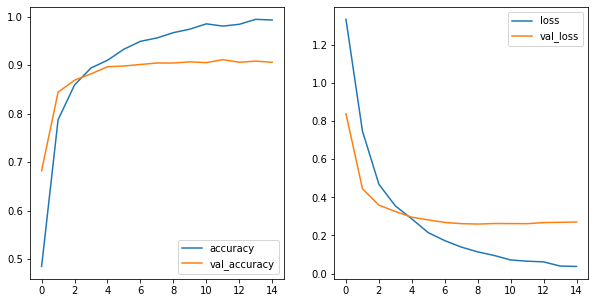

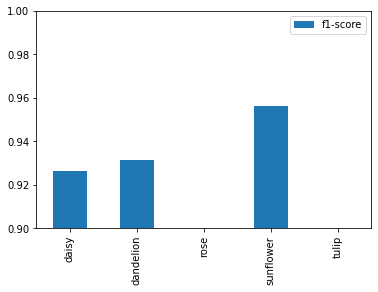

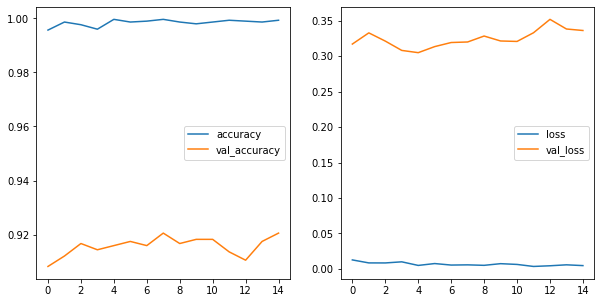

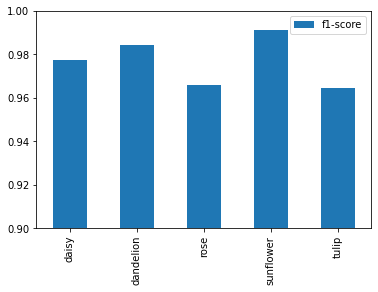

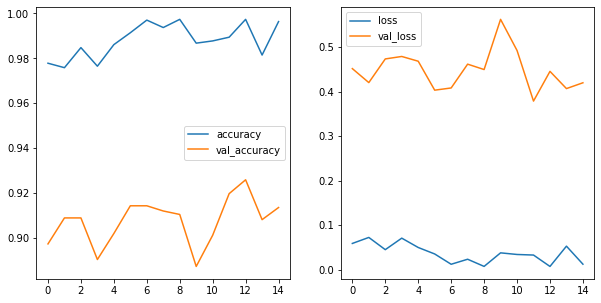

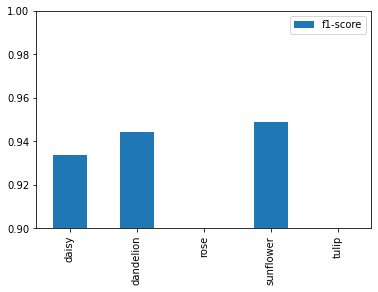

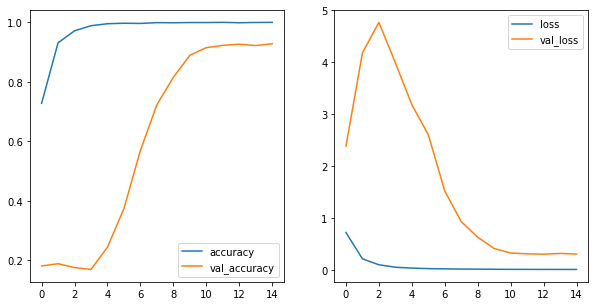

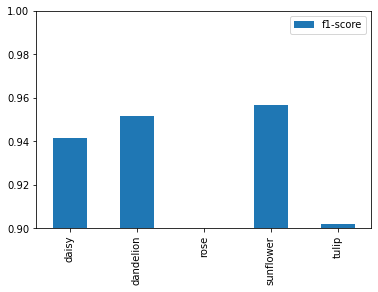

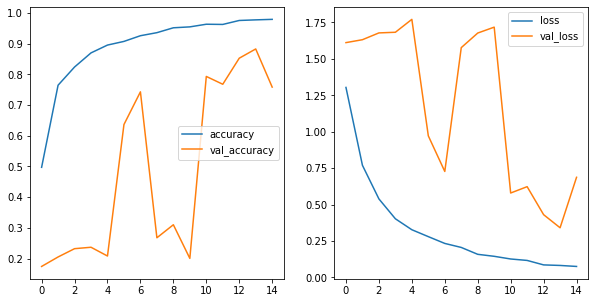

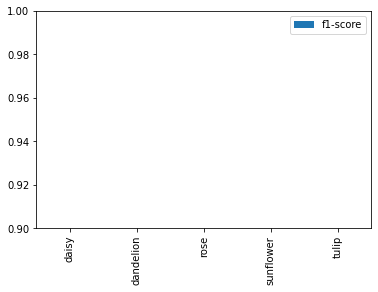

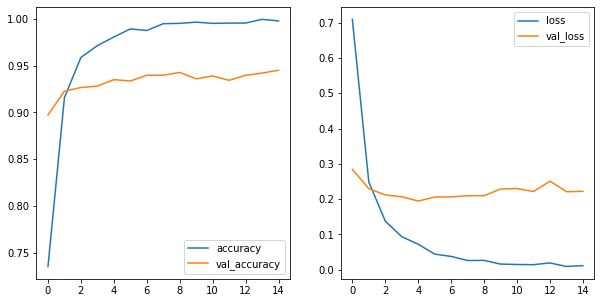

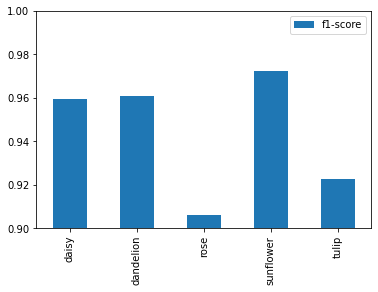

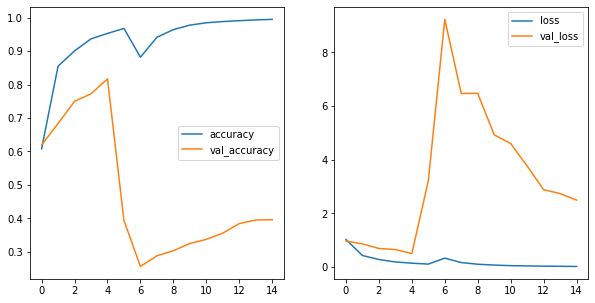

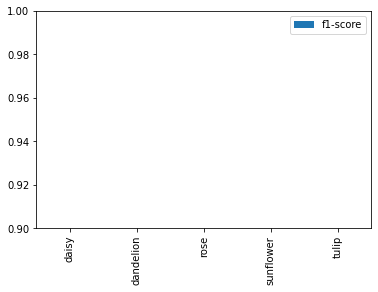

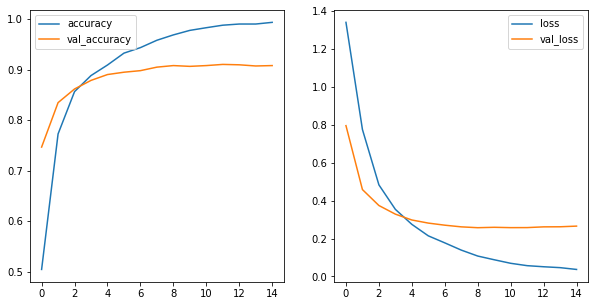

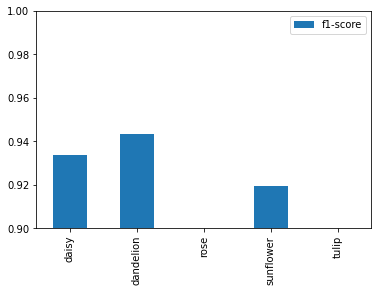

In [ ]:
dataset_folder_path ='/content/drive/MyDrive/Results/flowersDataSet'
archs = os.listdir(dataset_folder_path)
archs.remove('train.csv')
archs.remove('validation.csv')
model_results={}
for arch in archs:
  print('INFO: Srart test of : ' + arch)
  model_path = os.path.join(dataset_folder_path,arch,arch+'.h5')
  model = load_model(model_path)

  history_path = os.path.join(dataset_folder_path,arch,'history.csv')
  train_result_df = train_result(history_path)
  print("  -----> training history")
  print(train_result_df)
  print("  -----> training plots")
  plot_train_history(train_result_df)
  # Save plots

  crop_results_df = crops_evaluate_mdoel(model,validation_generator)
  print("  -----> print results per crop")
  print(crop_results_df)
  # Save crop_results_df
  print("  -----> plot results per crop")
  crop_results_df.plot(y='f1-score',kind='bar',ylim=(0.9,1))
  # Save plots
  # To do
  # Confusion matrix 
  # To do

  model_result = global_evaluate_mdoel(model,validation_generator)
  model_results[arch]=model_result

In [ ]:
glpbal_resuls_df= pd.DataFrame.from_dict(model_results,orient='index')
print("INFO: print global results")
print(glpbal_resuls_df)
#Save the global dataframe results
#To do

NameError: ignored

INFO: plot global results


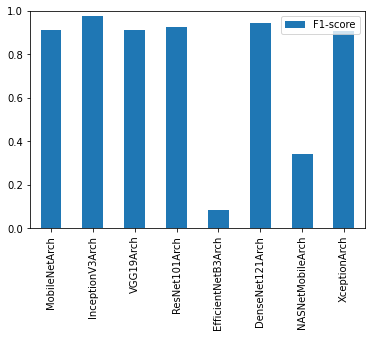

In [ ]:
print("INFO: plot global results")
glpbal_resuls_df.plot(y='F1-score',kind='bar',ylim=(0,1))

INFO: plot global results without EfficientB3Arch


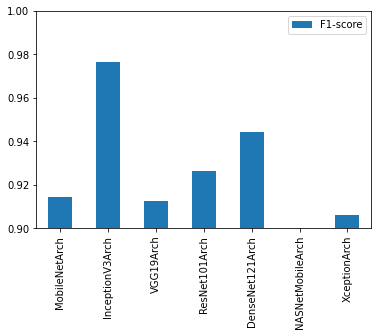

In [ ]:
print("INFO: plot global results without EfficientB3Arch")
data = glpbal_resuls_df.drop(['EfficientNetB3Arch'])
data.plot(y='F1-score',kind='bar',ylim=(0.9,1))

***Confusion Matrix***

In [ ]:

Classes_names =list(validation_generator.class_indices.keys())

In [ ]:
validation_generator.reset()
results = model.predict(validation_generator)
results = np.array(results)
predicted_labels_idx = np.argmax(results,axis=1)
predicted_labels_names = np.array([Classes_names[label] for label in predicted_labels_idx])
print(predicted_labels_names.shape)

(1296,)


In [ ]:
real_labels_idx = validation_generator.labels
real_labels_names = np.array([Classes_names[label] for label in real_labels_idx])
print(real_labels_names.shape)

(1296,)


In [ ]:
print(classification_report(real_labels_names,predicted_labels_names,labels=Classes_names))

              precision    recall  f1-score   support

       daisy       0.95      0.92      0.93       244
   dandelion       0.95      0.94      0.94       319
        rose       0.86      0.85      0.85       218
   sunflower       0.93      0.91      0.92       233
       tulip       0.85      0.91      0.88       282

    accuracy                           0.91      1296
   macro avg       0.91      0.90      0.91      1296
weighted avg       0.91      0.91      0.91      1296



In [ ]:
conf_matrix = confusion_matrix(real_labels_names,predicted_labels_names,labels=Classes_names,normalize='pred')
conf_matrix_df = pd.DataFrame(conf_matrix, index = Classes_names,columns = Classes_names)

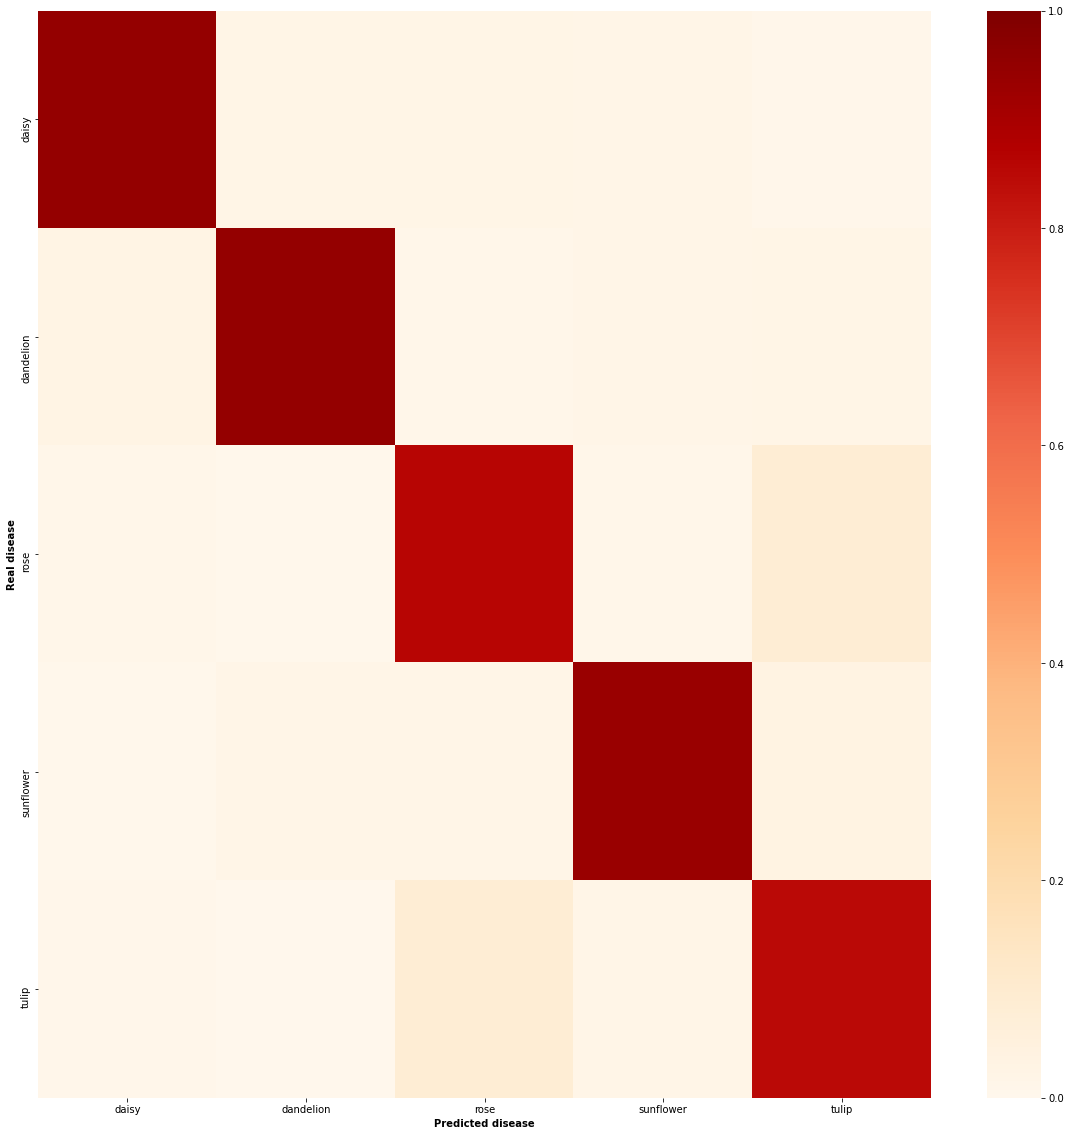

In [ ]:
plt.figure(figsize = (20,20))
heatmap = sn.heatmap(conf_matrix_df, annot=False,fmt='.2f',cmap="OrRd",vmin=0, vmax=1)
heatmap.set_xlabel('Predicted disease',fontsize = 10,fontweight="bold")
heatmap.set_ylabel('Real disease',fontsize = 10,fontweight="bold")
heatmap.figure.savefig("Confusion matrix.png")

***save dataframe***

In [ ]:
glpbal_resuls_df.to_csv("new_dogs_with_bmi.csv")

NameError: ignored

In [ ]:
validation_df.to_csv("new_dogs_with_bmi.csv")

In [ ]:
train_result_df.to_csv("new_dogs_with_bmi.csv")

NameError: ignored